In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/somministrazioni-vaccini-latest.csv')
df

,data_somministrazione,fornitore,area,fascia_anagrafica,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,2020-12-27,Pfizer/BioNTech,ABR,20-29,1,1,2,0,0,0,ITF,ITF1,13,Abruzzo
1,2020-12-27,Pfizer/BioNTech,ABR,30-39,1,4,5,0,0,0,ITF,ITF1,13,Abruzzo
2,2020-12-27,Pfizer/BioNTech,ABR,40-49,1,8,9,0,0,0,ITF,ITF1,13,Abruzzo
3,2020-12-27,Pfizer/BioNTech,ABR,50-59,7,6,13,0,0,0,ITF,ITF1,13,Abruzzo
4,2020-12-27,Pfizer/BioNTech,ABR,60-69,12,4,16,0,0,0,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159535,2021-12-08,Pfizer/BioNTech,VEN,60-69,1394,1411,58,34,1,2712,ITH,ITH3,5,Veneto
159536,2021-12-08,Pfizer/BioNTech,VEN,70-79,1394,1516,28,16,3,2863,ITH,ITH3,5,Veneto
159537,2021-12-08,Pfizer/BioNTech,VEN,80-89,481,709,6,12,0,1172,ITH,ITH3,5,Veneto
159538,2021-12-08,Pfizer/BioNTech,VEN,90+,62,128,3,0,0,187,ITH,ITH3,5,Veneto


In [ ]:
df1 = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/platea.csv')
df1

,area,nome_area,fascia_anagrafica,totale_popolazione
0,ABR,Abruzzo,12-19,94727
1,ABR,Abruzzo,20-29,125230
2,ABR,Abruzzo,30-39,146965
3,ABR,Abruzzo,40-49,187162
4,ABR,Abruzzo,50-59,208686
...,...,...,...,...
163,VEN,Veneto,40-49,715790
164,VEN,Veneto,50-59,806474
165,VEN,Veneto,60-69,610635
166,VEN,Veneto,70-79,494721


In [ ]:
df2 = df1.groupby('area')['totale_popolazione'].sum()
df2

area
ABR    1188922
BAS     494881
CAL    1689716
CAM    5104347
EMR    3998406
FVG    1088152
LAZ    5147533
LIG    1399466
LOM    9246804
MAR    1366477
MOL     273317
PAB     465181
PAT     481355
PIE    3927641
PUG    3572053
SAR    1484800
SIC    4435335
TOS    3360763
UMB     790414
VDA     110382
VEN    4383999
Name: totale_popolazione, dtype: int64

In [ ]:
df4 =  df.groupby('area', as_index=False)['prima_dose'].sum()
df4.insert(2, "popolazione_totale", df2.values, True)
df4

,area,prima_dose,popolazione_totale
0,ABR,991274,1188922
1,BAS,428495,494881
2,CAL,1379192,1689716
3,CAM,4224638,5104347
4,EMR,3473329,3998406
5,FVG,902585,1088152
6,LAZ,4542984,5147533
7,LIG,1186007,1399466
8,LOM,7972757,9246804
9,MAR,1132801,1366477


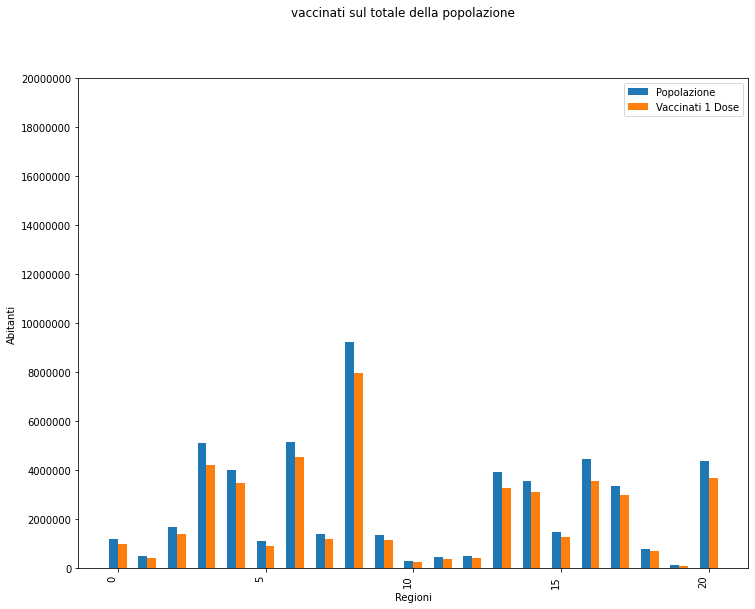

In [ ]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes()
fig.suptitle('vaccinati sul totale della popolazione')


ax.bar(df4.index-0.15, df4['popolazione_totale'], label="Popolazione", width=0.3)
ax.bar(df4.index+0.15, df4['prima_dose'], label="Vaccinati 1 Dose", width=0.3)



fig.autofmt_xdate(rotation=90)


ax.legend(loc=1)

ax.set_xlabel('Regioni')                           
ax.set_ylabel('Abitanti') 

ax.set_ylim([0, 20000000])                              
ax.set_yticklabels(np.arange(0, 20000001, step=2000000))
ax.set_yticks(np.arange(0, 20000001, step=2000000))

#x = np.arange(len(dfG['nome_area']))
#x.item()
#ax.set_xticks(x, dfG['nome_area'])
                          
plt.show()

fig.savefig('Grafico1.png')

In [ ]:
df5 = df4['prima_dose']*100/df4['popolazione_totale']
df5 

0     83.375865
1     86.585462
2     81.622711
3     82.765494
4     86.867842
5     82.946592
6     88.255559
7     84.747111
8     86.221758
9     82.899383
10    87.026420
11    79.474441
12    85.691434
13    83.653623
14    87.061194
15    85.350148
16    79.776793
17    88.477438
18    86.182557
19    81.045823
20    83.812656
dtype: float64

In [ ]:
df6 = df1.groupby('area', as_index=False)[['totale_popolazione']].sum()
df6.insert(2, "Percentuale_Vaccinati_Prima_Dose", df5.values, True)
df6

,area,totale_popolazione,Percentuale_Vaccinati_Prima_Dose
0,ABR,1188922,83.375865
1,BAS,494881,86.585462
2,CAL,1689716,81.622711
3,CAM,5104347,82.765494
4,EMR,3998406,86.867842
5,FVG,1088152,82.946592
6,LAZ,5147533,88.255559
7,LIG,1399466,84.747111
8,LOM,9246804,86.221758
9,MAR,1366477,82.899383


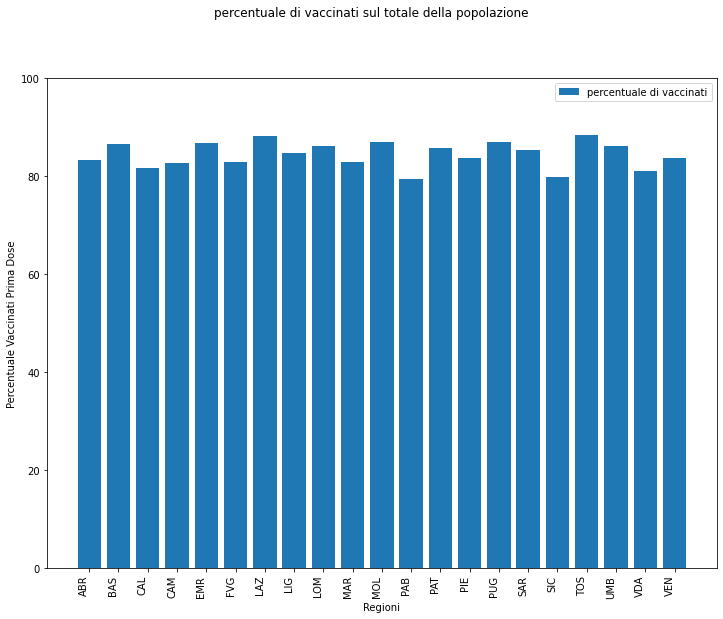

In [ ]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes()

fig.suptitle('percentuale di vaccinati sul totale della popolazione')


ax.bar(df6['area'], df6['Percentuale_Vaccinati_Prima_Dose'], label="percentuale di vaccinati")


fig.autofmt_xdate(rotation=90)

ax.legend(loc=1)

ax.set_xlabel('Regioni')                           
ax.set_ylabel('Percentuale Vaccinati Prima Dose') 

ax.set_ylim([0, 100])                              
ax.set_yticks(np.arange(0, 101, step=20))

plt.show()
fig.savefig('Grafico2.png')